In [1]:
# importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm


In [2]:
# loading the data into the notebook

pd.set_option('display.max_columns', None)

microplastics = pd.read_csv('data\Marine_Microplastics_WGS84_5159774935198085819.csv')
microplastics.head()

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\charl\AppData\Local\Temp\ipykernel_30280\1403017363.py:5: SyntaxWarning: invalid escape sequence '\M'
  microplastics = pd.read_csv('data\Marine_Microplastics_WGS84_5159774935198085819.csv')


OBJECTID          Oceans Regions SubRegions Sampling Method  Measurement  \
0         1  Atlantic Ocean     NaN        NaN     Neuston net     0.000000   
1         2  Atlantic Ocean     NaN        NaN     Neuston net     0.002276   
2         3  Atlantic Ocean     NaN        NaN     Neuston net     0.004320   
3         4  Atlantic Ocean     NaN        NaN     Neuston net     0.000000   
4         5  Atlantic Ocean     NaN        NaN     Neuston net     0.000000   

        Unit Density Range Density Class Short Reference  \
0  pieces/m3      0-0.0005      Very Low  Law et al.2010   
1  pieces/m3  0.0005-0.005           Low  Law et al.2010   
2  pieces/m3  0.0005-0.005           Low  Law et al.2010   
3  pieces/m3      0-0.0005      Very Low  Law et al.2010   
4  pieces/m3      0-0.0005      Very Low  Law et al.2010   

                                      Long Reference  \
0  Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...   
1  Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...   
2  Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...   
3  Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...   
4  Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...   

                                       DOI               Organization  \
0  https://doi.org/10.1126/science.1192321  Sea Education Association   
1  https://doi.org/10.1126/science.1192321  Sea Education Association   
2  https://doi.org/10.1126/science.1192321  Sea Education Association   
3  https://doi.org/10.1126/science.1192321  Sea Education Association   
4  https://doi.org/10.1126/science.1192321  Sea Education Association   

  Keywords  Accession Number  \
0      SEA            211007   
1      SEA            211007   
2      SEA            211007   
3      SEA            211007   
4      SEA            211007   

                                      Accession Link  Latitude  Longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land...     45.28     -60.29   
1  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
2  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
3  https://www.ncei.noaa.gov/access/metadata/land...     40.30     -69.77   
4  https://www.ncei.noaa.gov/access/metadata/land...     39.88     -67.15   

                     Date                              GlobalID      x      y  
0   7/13/1989 12:00:00 AM  88ccb360-a4b6-4dac-954e-4eb7d61ecab4 -60.29  45.28  
1  10/12/1989 12:00:00 AM  5a9c64f2-a6fb-40ed-a79a-f4bbb586d753 -70.65  40.93  
2  10/12/1989 12:00:00 AM  a09a6842-c66a-4718-9989-4907cd428f38 -70.65  40.93  
3  10/12/1989 12:00:00 AM  ce10e70e-5af9-4bb9-80ac-3467c3e90fba -69.77  40.30  
4  10/15/1989 12:00:00 AM  c2ccdc44-5c00-4e4d-bdcb-ae435dcefefd -67.15  39.88

In [3]:
# looking at the column titles

print(microplastics.columns)

Index(['OBJECTID', 'Oceans', 'Regions', 'SubRegions', 'Sampling Method',
       'Measurement', 'Unit', 'Density Range', 'Density Class',
       'Short Reference', 'Long Reference', 'DOI', 'Organization', 'Keywords',
       'Accession Number', 'Accession Link', 'Latitude', 'Longitude', 'Date',
       'GlobalID', 'x', 'y'],
      dtype='object')


In [4]:
# producing a new dataframe called 'data' with only the columns we are interested in 

data = microplastics[['Oceans', 'Regions', 'SubRegions', 'Sampling Method',
       'Measurement', 'Unit', 'Density Range', 'Density Class', 'Organization', 'Accession Link',
       'Latitude', 'Longitude', 'Date', 'x', 'y']]

data.head()

Oceans Regions SubRegions Sampling Method  Measurement       Unit  \
0  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
1  Atlantic Ocean     NaN        NaN     Neuston net     0.002276  pieces/m3   
2  Atlantic Ocean     NaN        NaN     Neuston net     0.004320  pieces/m3   
3  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
4  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   

  Density Range Density Class               Organization  \
0      0-0.0005      Very Low  Sea Education Association   
1  0.0005-0.005           Low  Sea Education Association   
2  0.0005-0.005           Low  Sea Education Association   
3      0-0.0005      Very Low  Sea Education Association   
4      0-0.0005      Very Low  Sea Education Association   

                                      Accession Link  Latitude  Longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land...     45.28     -60.29   
1  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
2  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
3  https://www.ncei.noaa.gov/access/metadata/land...     40.30     -69.77   
4  https://www.ncei.noaa.gov/access/metadata/land...     39.88     -67.15   

                     Date      x      y  
0   7/13/1989 12:00:00 AM -60.29  45.28  
1  10/12/1989 12:00:00 AM -70.65  40.93  
2  10/12/1989 12:00:00 AM -70.65  40.93  
3  10/12/1989 12:00:00 AM -69.77  40.30  
4  10/15/1989 12:00:00 AM -67.15  39.88

In [5]:
# reformatting the column titles 

data.columns = data.columns.str.strip().str.lower()
data.head()

oceans regions subregions sampling method  measurement       unit  \
0  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
1  Atlantic Ocean     NaN        NaN     Neuston net     0.002276  pieces/m3   
2  Atlantic Ocean     NaN        NaN     Neuston net     0.004320  pieces/m3   
3  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
4  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   

  density range density class               organization  \
0      0-0.0005      Very Low  Sea Education Association   
1  0.0005-0.005           Low  Sea Education Association   
2  0.0005-0.005           Low  Sea Education Association   
3      0-0.0005      Very Low  Sea Education Association   
4      0-0.0005      Very Low  Sea Education Association   

                                      accession link  latitude  longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land...     45.28     -60.29   
1  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
2  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
3  https://www.ncei.noaa.gov/access/metadata/land...     40.30     -69.77   
4  https://www.ncei.noaa.gov/access/metadata/land...     39.88     -67.15   

                     date      x      y  
0   7/13/1989 12:00:00 AM -60.29  45.28  
1  10/12/1989 12:00:00 AM -70.65  40.93  
2  10/12/1989 12:00:00 AM -70.65  40.93  
3  10/12/1989 12:00:00 AM -69.77  40.30  
4  10/15/1989 12:00:00 AM -67.15  39.88

In [7]:
# extracting the month and year from the date column

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

data.head()

C:\Users\charl\AppData\Local\Temp\ipykernel_30280\1616743837.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\charl\AppData\Local\Temp\ipykernel_30280\1616743837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
C:\Users\charl\AppData\Local\Temp\ipykernel_30280\1616743837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

oceans regions subregions sampling method  measurement       unit  \
0  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
1  Atlantic Ocean     NaN        NaN     Neuston net     0.002276  pieces/m3   
2  Atlantic Ocean     NaN        NaN     Neuston net     0.004320  pieces/m3   
3  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
4  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   

  density range density class               organization  \
0      0-0.0005      Very Low  Sea Education Association   
1  0.0005-0.005           Low  Sea Education Association   
2  0.0005-0.005           Low  Sea Education Association   
3      0-0.0005      Very Low  Sea Education Association   
4      0-0.0005      Very Low  Sea Education Association   

                                      accession link  latitude  longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land...     45.28     -60.29   
1  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
2  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
3  https://www.ncei.noaa.gov/access/metadata/land...     40.30     -69.77   
4  https://www.ncei.noaa.gov/access/metadata/land...     39.88     -67.15   

        date      x      y  year  month  
0 1989-07-13 -60.29  45.28  1989      7  
1 1989-10-12 -70.65  40.93  1989     10  
2 1989-10-12 -70.65  40.93  1989     10  
3 1989-10-12 -69.77  40.30  1989     10  
4 1989-10-15 -67.15  39.88  1989     10

Defining the seasons according to the [Met Office](https://www.metoffice.gov.uk/weather/learn-about/met-office-for-schools/other-content/other-resources/our-seasons).

**Winter:** December (12), January (1), February (2)

**Spring:** March (3), April (4), May (5)

**Summer:** June (6), July (7), August (8)

**Autumn:** September (9), October (10), November (11)

In [8]:
# attributing seasons to the data based on the 'month' column, stored in a new 'season 'column

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    
data['season'] = data['month'].apply(get_season)
data.head()

C:\Users\charl\AppData\Local\Temp\ipykernel_30280\4228567457.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'] = data['month'].apply(get_season)


oceans regions subregions sampling method  measurement       unit  \
0  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
1  Atlantic Ocean     NaN        NaN     Neuston net     0.002276  pieces/m3   
2  Atlantic Ocean     NaN        NaN     Neuston net     0.004320  pieces/m3   
3  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
4  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   

  density range density class               organization  \
0      0-0.0005      Very Low  Sea Education Association   
1  0.0005-0.005           Low  Sea Education Association   
2  0.0005-0.005           Low  Sea Education Association   
3      0-0.0005      Very Low  Sea Education Association   
4      0-0.0005      Very Low  Sea Education Association   

                                      accession link  latitude  longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land...     45.28     -60.29   
1  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
2  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
3  https://www.ncei.noaa.gov/access/metadata/land...     40.30     -69.77   
4  https://www.ncei.noaa.gov/access/metadata/land...     39.88     -67.15   

        date      x      y  year  month  season  
0 1989-07-13 -60.29  45.28  1989      7  Summer  
1 1989-10-12 -70.65  40.93  1989     10  Autumn  
2 1989-10-12 -70.65  40.93  1989     10  Autumn  
3 1989-10-12 -69.77  40.30  1989     10  Autumn  
4 1989-10-15 -67.15  39.88  1989     10  Autumn

In [52]:
print(data.columns)

Index(['oceans', 'regions', 'subregions', 'sampling method', 'measurement',
       'unit', 'density range', 'density class', 'organization',
       'accession link', 'latitude', 'longitude', 'date', 'x', 'y', 'year',
       'month', 'season'],
      dtype='object')


In [25]:
# checking the data types

data.dtypes

oceans                     object
regions                    object
subregions                 object
sampling method            object
measurement               float64
unit                       object
density range              object
density class              object
organization               object
accession link             object
latitude                  float64
longitude                 float64
date               datetime64[ns]
x                         float64
y                         float64
year                        int32
month                       int32
season                     object
dtype: object

In [26]:
# number of rows in the data dataframe 

len(data)

22266

In [27]:
# checking if there are missing values in the dataset

missing_values = data.isnull().sum()
missing_values[missing_values > 0]

## we have decided not to take care of any missing values, because they still have necessary data in other columns

oceans           271
regions        12076
subregions     20815
measurement     5817
dtype: int64

In [28]:
# investigating the oceans missing values to see what other location data there is

oceans_nan = data[data['oceans'].isna()]
oceans_nan.head()

# when data on oceans is missing, region and subregional data is also nan - but there is longitude and latitude data these values can be plotted


oceans regions subregions sampling method  measurement            unit  \
16353    NaN     NaN        NaN    Hand picking          NaN  pieces/10 mins   
16646    NaN     NaN        NaN    Hand picking          NaN  pieces/10 mins   
16648    NaN     NaN        NaN    Hand picking          NaN  pieces/10 mins   
16663    NaN     NaN        NaN    Hand picking          NaN  pieces/10 mins   
16665    NaN     NaN        NaN    Hand picking          NaN  pieces/10 mins   

      density range density class  \
16353          2-40        Medium   
16646          2-40        Medium   
16648          2-40        Medium   
16663          2-40        Medium   
16665           1-2           Low   

                                       organization  \
16353  University of Texas Marine Science Institute   
16646  University of Texas Marine Science Institute   
16648  University of Texas Marine Science Institute   
16663  University of Texas Marine Science Institute   
16665  University of Texas Marine Science Institute   

                                          accession link  latitude  longitude  \
16353  https://www.ncei.noaa.gov/access/metadata/land...   43.2157   -81.9591   
16646  https://www.ncei.noaa.gov/access/metadata/land...   40.8924   -90.6123   
16648  https://www.ncei.noaa.gov/access/metadata/land...   40.8925   -90.6123   
16663  https://www.ncei.noaa.gov/access/metadata/land...   40.9349   -90.9574   
16665  https://www.ncei.noaa.gov/access/metadata/land...   43.3468   -70.4736   

            date        x        y  year  month  season  
16353 2019-05-19 -81.9591  43.2157  2019      5  Spring  
16646 2019-07-24 -90.6123  40.8924  2019      7  Summer  
16648 2019-07-25 -90.6123  40.8925  2019      7  Summer  
16663 2019-07-27 -90.9574  40.9349  2019      7  Summer  
16665 2019-07-28 -70.4736  43.3468  2019      7  Summer

In [29]:
# investigating where there are missing measurement values

measurement_nan = data[data['measurement'].isna()]
measurement_nan['sampling method'].value_counts()

## all the nan measurement values are attributed to hand picking as the sampling method

sampling method
Hand picking    5817
Name: count, dtype: int64

In [30]:
# creating a separate dataframe that drops nan values for the measurement column for use in visualisation

measurements = data.dropna(subset=['measurement'])
measurements.head()

oceans regions subregions sampling method  measurement       unit  \
0  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
1  Atlantic Ocean     NaN        NaN     Neuston net     0.002276  pieces/m3   
2  Atlantic Ocean     NaN        NaN     Neuston net     0.004320  pieces/m3   
3  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
4  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   

  density range density class               organization  \
0      0-0.0005      Very Low  Sea Education Association   
1  0.0005-0.005           Low  Sea Education Association   
2  0.0005-0.005           Low  Sea Education Association   
3      0-0.0005      Very Low  Sea Education Association   
4      0-0.0005      Very Low  Sea Education Association   

                                      accession link  latitude  longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land...     45.28     -60.29   
1  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
2  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
3  https://www.ncei.noaa.gov/access/metadata/land...     40.30     -69.77   
4  https://www.ncei.noaa.gov/access/metadata/land...     39.88     -67.15   

        date      x      y  year  month  season  
0 1989-07-13 -60.29  45.28  1989      7  Summer  
1 1989-10-12 -70.65  40.93  1989     10  Autumn  
2 1989-10-12 -70.65  40.93  1989     10  Autumn  
3 1989-10-12 -69.77  40.30  1989     10  Autumn  
4 1989-10-15 -67.15  39.88  1989     10  Autumn

In [31]:
# number of rows in the measurements dataframe 

len(measurements)

16449

# END OF DATA CLEANING

In [32]:
(data['subregions']).value_counts()

subregions
Western Basin                             356
Tampa Bay                                 224
Eastern Basin                             169
Gulf of Mannar                            144
Balearic Sea                              144
Tyrrhenian Sea                            140
Ionian Sea                                 62
Aegean Sea                                 59
Adriatic Sea                               55
Ligurian Sea                               49
Alboran Sea                                23
Coastal Waters of Florida                  12
Florida Keys National Marine Sanctuary      7
Strait of Gibraltar                         3
Gulf of Riga                                2
Gulf of Suez                                1
Gulf of Bothnia                             1
Name: count, dtype: int64

In [33]:
(data['sampling method']).value_counts()

sampling method
Neuston net                  10390
Hand picking                  5835
Manta net                     2731
Grab sample                   1389
PVC cylinder                   370
Intake seawater pump           284
Van Dorn sampler               181
Metal spoon                    135
Plankton net                   100
Megacorer                       90
Metal scoop                     89
plankton net                    72
shovel                          72
Stainless steel bucket          69
Trowel                          60
Aluminum bucket                 57
Stainless steel spoon           50
CTD rosette sampler             48
Ekman dredge                    45
Remotely operated vehicle       40
AVANI net                       36
Petite Ponar benthic grab       36
Sediment grab sampler           26
stainless-steel sampler         23
Day grab                        17
Shipek grab sampler              9
Van Veen grab sampler            7
Surface water intake             5
Name

In [34]:
(data['unit']).value_counts()

unit
pieces/m3           16031
pieces/10 mins       5817
pieces kg-1 d.w.      418
Name: count, dtype: int64

In [35]:
neuston_net = data[data['sampling method'] == 'Neuston net']
neuston_net.head()

oceans regions subregions sampling method  measurement       unit  \
0  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
1  Atlantic Ocean     NaN        NaN     Neuston net     0.002276  pieces/m3   
2  Atlantic Ocean     NaN        NaN     Neuston net     0.004320  pieces/m3   
3  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
4  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   

  density range density class               organization  \
0      0-0.0005      Very Low  Sea Education Association   
1  0.0005-0.005           Low  Sea Education Association   
2  0.0005-0.005           Low  Sea Education Association   
3      0-0.0005      Very Low  Sea Education Association   
4      0-0.0005      Very Low  Sea Education Association   

                                      accession link  latitude  longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land...     45.28     -60.29   
1  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
2  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
3  https://www.ncei.noaa.gov/access/metadata/land...     40.30     -69.77   
4  https://www.ncei.noaa.gov/access/metadata/land...     39.88     -67.15   

        date      x      y  year  month  season  
0 1989-07-13 -60.29  45.28  1989      7  Summer  
1 1989-10-12 -70.65  40.93  1989     10  Autumn  
2 1989-10-12 -70.65  40.93  1989     10  Autumn  
3 1989-10-12 -69.77  40.30  1989     10  Autumn  
4 1989-10-15 -67.15  39.88  1989     10  Autumn

In [36]:
len(neuston_net)

10390

In [37]:
hand_picking = data[data['sampling method'] == 'Hand picking']
hand_picking.head()

oceans         regions subregions sampling method  measurement  \
15598  Atlantic Ocean  Gulf of Mexico        NaN    Hand picking          NaN   
15599  Atlantic Ocean  Gulf of Mexico        NaN    Hand picking          NaN   
15600  Atlantic Ocean  Gulf of Mexico        NaN    Hand picking          NaN   
15601  Atlantic Ocean  Gulf of Mexico        NaN    Hand picking          NaN   
15602  Atlantic Ocean  Gulf of Mexico        NaN    Hand picking          NaN   

                 unit density range density class  \
15598  pieces/10 mins          2-40        Medium   
15599  pieces/10 mins        40-200          High   
15600  pieces/10 mins        40-200          High   
15601  pieces/10 mins          2-40        Medium   
15602  pieces/10 mins           1-2           Low   

                                       organization  \
15598  University of Texas Marine Science Institute   
15599  University of Texas Marine Science Institute   
15600  University of Texas Marine Science Institute   
15601  University of Texas Marine Science Institute   
15602  University of Texas Marine Science Institute   

                                          accession link  latitude  longitude  \
15598  https://www.ncei.noaa.gov/access/metadata/land...   27.2049   -97.3645   
15599  https://www.ncei.noaa.gov/access/metadata/land...   27.4147   -97.3016   
15600  https://www.ncei.noaa.gov/access/metadata/land...   27.6057   -97.2077   
15601  https://www.ncei.noaa.gov/access/metadata/land...   26.0983   -97.1623   
15602  https://www.ncei.noaa.gov/access/metadata/land...   27.8322   -97.3784   

            date        x        y  year  month  season  
15598 2018-11-07 -97.3645  27.2049  2018     11  Autumn  
15599 2018-11-18 -97.3016  27.4147  2018     11  Autumn  
15600 2018-11-20 -97.2077  27.6057  2018     11  Autumn  
15601 2018-11-27 -97.1623  26.0983  2018     11  Autumn  
15602 2018-11-28 -97.3784  27.8322  2018     11  Autumn

In [38]:
len(hand_picking)

5835

In [39]:
manta_net = data[data['sampling method'] == 'Manta net']
manta_net.head()

oceans     regions subregions sampling method  measurement  \
10186  Pacific Ocean  Tasman Sea        NaN       Manta net     0.008330   
10187  Pacific Ocean  Tasman Sea        NaN       Manta net     0.032146   
10188  Pacific Ocean  Tasman Sea        NaN       Manta net     0.027710   
10189  Pacific Ocean  Tasman Sea        NaN       Manta net     0.000000   
10190  Pacific Ocean  Tasman Sea        NaN       Manta net     0.000000   

            unit density range density class                     organization  \
10186  pieces/m3       0.005-1        Medium  University of Western Australia   
10187  pieces/m3       0.005-1        Medium  University of Western Australia   
10188  pieces/m3       0.005-1        Medium  University of Western Australia   
10189  pieces/m3      0-0.0005      Very Low  University of Western Australia   
10190  pieces/m3      0-0.0005      Very Low  University of Western Australia   

                                          accession link  latitude  longitude  \
10186  https://www.ncei.noaa.gov/access/metadata/land... -41.89778  148.44818   
10187  https://www.ncei.noaa.gov/access/metadata/land... -41.88393  148.48472   
10188  https://www.ncei.noaa.gov/access/metadata/land... -41.87590  148.50267   
10189  https://www.ncei.noaa.gov/access/metadata/land... -39.65648  148.89263   
10190  https://www.ncei.noaa.gov/access/metadata/land... -39.65205  148.87323   

            date          x         y  year  month  season  
10186 2012-04-11  148.44818 -41.89778  2012      4  Spring  
10187 2012-04-11  148.48472 -41.88393  2012      4  Spring  
10188 2012-04-11  148.50267 -41.87590  2012      4  Spring  
10189 2012-04-12  148.89263 -39.65648  2012      4  Spring  
10190 2012-04-12  148.87323 -39.65205  2012      4  Spring

In [40]:
len(manta_net)

2731

In [41]:
grab_sample = data[data['sampling method'] == 'Grab sample']
grab_sample.head()

oceans         regions subregions sampling method  measurement  \
8665  Pacific Ocean  Gulf of Alaska        NaN     Grab sample        0.001   
8666  Pacific Ocean  Gulf of Alaska        NaN     Grab sample        0.001   
8667  Pacific Ocean  Gulf of Alaska        NaN     Grab sample        0.014   
8668  Pacific Ocean  Gulf of Alaska        NaN     Grab sample        0.017   
8669  Pacific Ocean  Gulf of Alaska        NaN     Grab sample        0.071   

           unit density range density class         organization  \
8665  pieces/m3  0.0005-0.005           Low  Adventure Scientist   
8666  pieces/m3  0.0005-0.005           Low  Adventure Scientist   
8667  pieces/m3       0.005-1        Medium  Adventure Scientist   
8668  pieces/m3       0.005-1        Medium  Adventure Scientist   
8669  pieces/m3       0.005-1        Medium  Adventure Scientist   

                                         accession link  latitude  longitude  \
8665  https://www.ncei.noaa.gov/access/metadata/land...   59.3787  -153.5209   
8666  https://www.ncei.noaa.gov/access/metadata/land...   59.3681  -153.5523   
8667  https://www.ncei.noaa.gov/access/metadata/land...   59.3415  -153.5498   
8668  https://www.ncei.noaa.gov/access/metadata/land...   59.6387  -153.3957   
8669  https://www.ncei.noaa.gov/access/metadata/land...   59.3736  -153.4481   

           date         x        y  year  month  season  
8665 2013-07-01 -153.5209  59.3787  2013      7  Summer  
8666 2013-07-01 -153.5523  59.3681  2013      7  Summer  
8667 2013-07-01 -153.5498  59.3415  2013      7  Summer  
8668 2013-07-01 -153.3957  59.6387  2013      7  Summer  
8669 2013-07-01 -153.4481  59.3736  2013      7  Summer

In [42]:
len(grab_sample)

1389

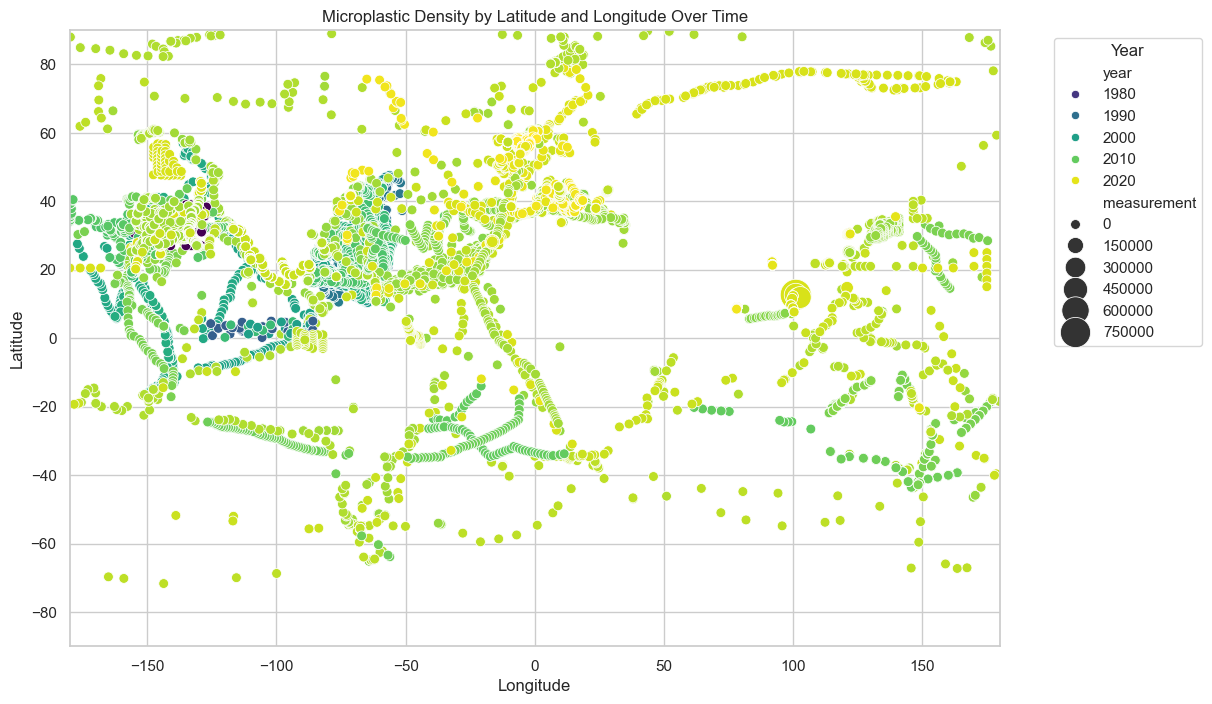

In [79]:
# temporal analysis

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data, x='longitude', y='latitude', hue='year', size='measurement', palette='viridis', sizes=(50, 500))
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.title('Microplastic Density by Latitude and Longitude Over Time')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

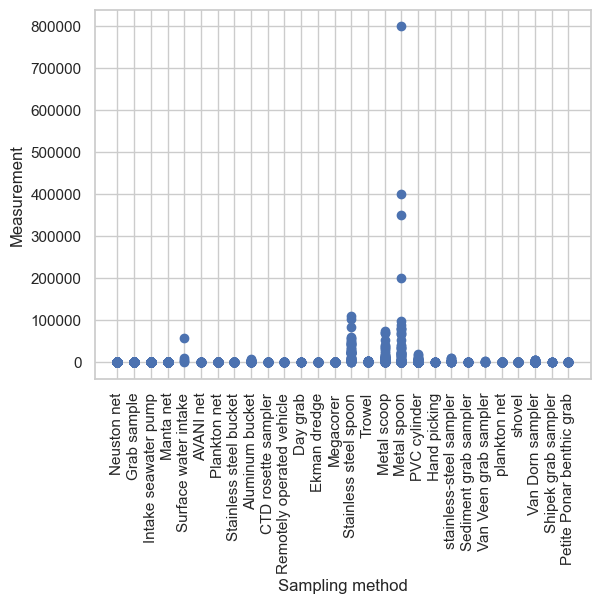

In [45]:
plt.scatter('sampling method', 'measurement', data = data)
plt.xlabel('Sampling method')
plt.ylabel('Measurement')
plt.xticks(rotation = 90)
plt.show()

In [46]:
measurements['measurement'].sort_values(ascending =False)

15174    800000.0
15175    400000.0
15202    352000.0
15201    200000.0
15016    110480.0
           ...   
57            0.0
56            0.0
53            0.0
9457          0.0
39            0.0
Name: measurement, Length: 16449, dtype: float64

In [47]:
measurements.loc[15174]

oceans                                                 Pacific Ocean
regions                                             Gulf of Thailand
subregions                                                       NaN
sampling method                                          Metal spoon
measurement                                                 800000.0
unit                                                       pieces/m3
density range                                                 >40000
density class                                              Very High
organization             Chulalongkorn University, Bangkok, Thailand
accession link     https://www.ncei.noaa.gov/access/metadata/land...
latitude                                                   12.663611
longitude                                                 101.038333
date                                             2019-04-11 00:00:00
x                                                         101.038333
y                                 

In [49]:

sampling_counts = data['sampling method'].value_counts()
above_100 = sampling_counts[sampling_counts >= 100].index
above_100_samples = data[data['sampling method'].isin(above_100)]

above_100_samples['sampling method'].value_counts()


sampling method
Neuston net             10390
Hand picking             5835
Manta net                2731
Grab sample              1389
PVC cylinder              370
Intake seawater pump      284
Van Dorn sampler          181
Metal spoon               135
Plankton net              100
Name: count, dtype: int64

In [50]:
len(above_100_samples)

21415

In [51]:
# descriptive stats for the sampling methods

grouped_stats = data.groupby('sampling method')['measurement'].describe()
grouped_stats

count          mean           std          min  \
sampling method                                                               
AVANI net                     36.0      0.117038      0.279832     0.005113   
Aluminum bucket               57.0   2089.859649   1341.990835   703.000000   
CTD rosette sampler           48.0     46.500000     62.137117     0.000000   
Day grab                      17.0     30.658824     18.790791     2.400000   
Ekman dredge                  45.0    115.000000     60.687351    10.000000   
Grab sample                 1389.0      0.012778      0.027354     0.000000   
Hand picking                  18.0      0.580247      0.722655     0.000000   
Intake seawater pump         284.0     13.976388     34.935007     0.000000   
Manta net                   2731.0      1.901485      7.432924     0.000000   
Megacorer                     90.0     53.238359     66.309323     0.000000   
Metal scoop                   89.0   9740.112360  15525.036707     0.000000   
Metal spoon                  135.0  22074.737111  84874.893157     0.000000   
Neuston net                10390.0      0.117594      0.788380     0.000000   
PVC cylinder                 370.0   1801.343135   2162.471521     0.000000   
Petite Ponar benthic grab     36.0    217.870370    470.149691    23.333333   
Plankton net                 100.0      2.221446      2.672905     0.190000   
Remotely operated vehicle     40.0      9.575000      9.125584     0.000000   
Sediment grab sampler         26.0    107.193270     46.367413    34.278597   
Shipek grab sampler            9.0    278.888889    291.008782    30.000000   
Stainless steel bucket        69.0    998.014493    430.774081   411.000000   
Stainless steel spoon         50.0  25532.800000  25917.144514    80.000000   
Surface water intake           5.0  15828.000000  23683.013850  1580.000000   
Trowel                        60.0   1673.333333    967.160209   480.000000   
Van Dorn sampler             181.0    926.353591   1337.757646     0.000000   
Van Veen grab sampler          7.0   1802.228571   1372.754852   638.900000   
plankton net                  72.0      0.262925      0.277434     0.013300   
shovel                        72.0     79.756944    126.336775     1.330000   
stainless-steel sampler       23.0   3521.739130   2516.663831  1200.000000   

                                   25%           50%           75%  \
sampling method                                                      
AVANI net                     0.019015      0.062537      0.111311   
Aluminum bucket            1083.000000   1710.000000   2635.333333   
CTD rosette sampler          21.000000     21.000000     63.000000   
Day grab                     15.200000     30.600000     40.000000   
Ekman dredge                 70.000000    120.000000    165.000000   
Grab sample                   0.001000      0.005000      0.012000   
Hand picking                  0.000000      0.388889      0.861111   
Intake seawater pump          0.500000      1.000000     11.000000   
Manta net                     0.082548      0.440247      1.603295   
Megacorer                     0.000000     39.974221     77.980618   
Metal scoop                1600.000000   4000.000000   9600.000000   
Metal spoon                 413.560000    777.720000   6200.000000   
Neuston net                   0.000000      0.003600      0.023760   
PVC cylinder                705.218618   1410.437236   2119.121673   
Petite Ponar benthic grab    43.333333     56.666667     74.166666   
Plankton net                  0.562500      1.232050      2.950000   
Remotely operated vehicle     3.000000      7.000000     14.000000   
Sediment grab sampler        76.096612     99.500000    138.000000   
Shipek grab sampler          60.000000    180.000000    380.000000   
Stainless steel bucket      719.000000    924.000000   1104.000000   
Stainless steel spoon      4660.000000  21840.000000  40860.000000   
Surface water intake       3405.000000   5015.00

# Ocean analysis

We are interested in investigating..

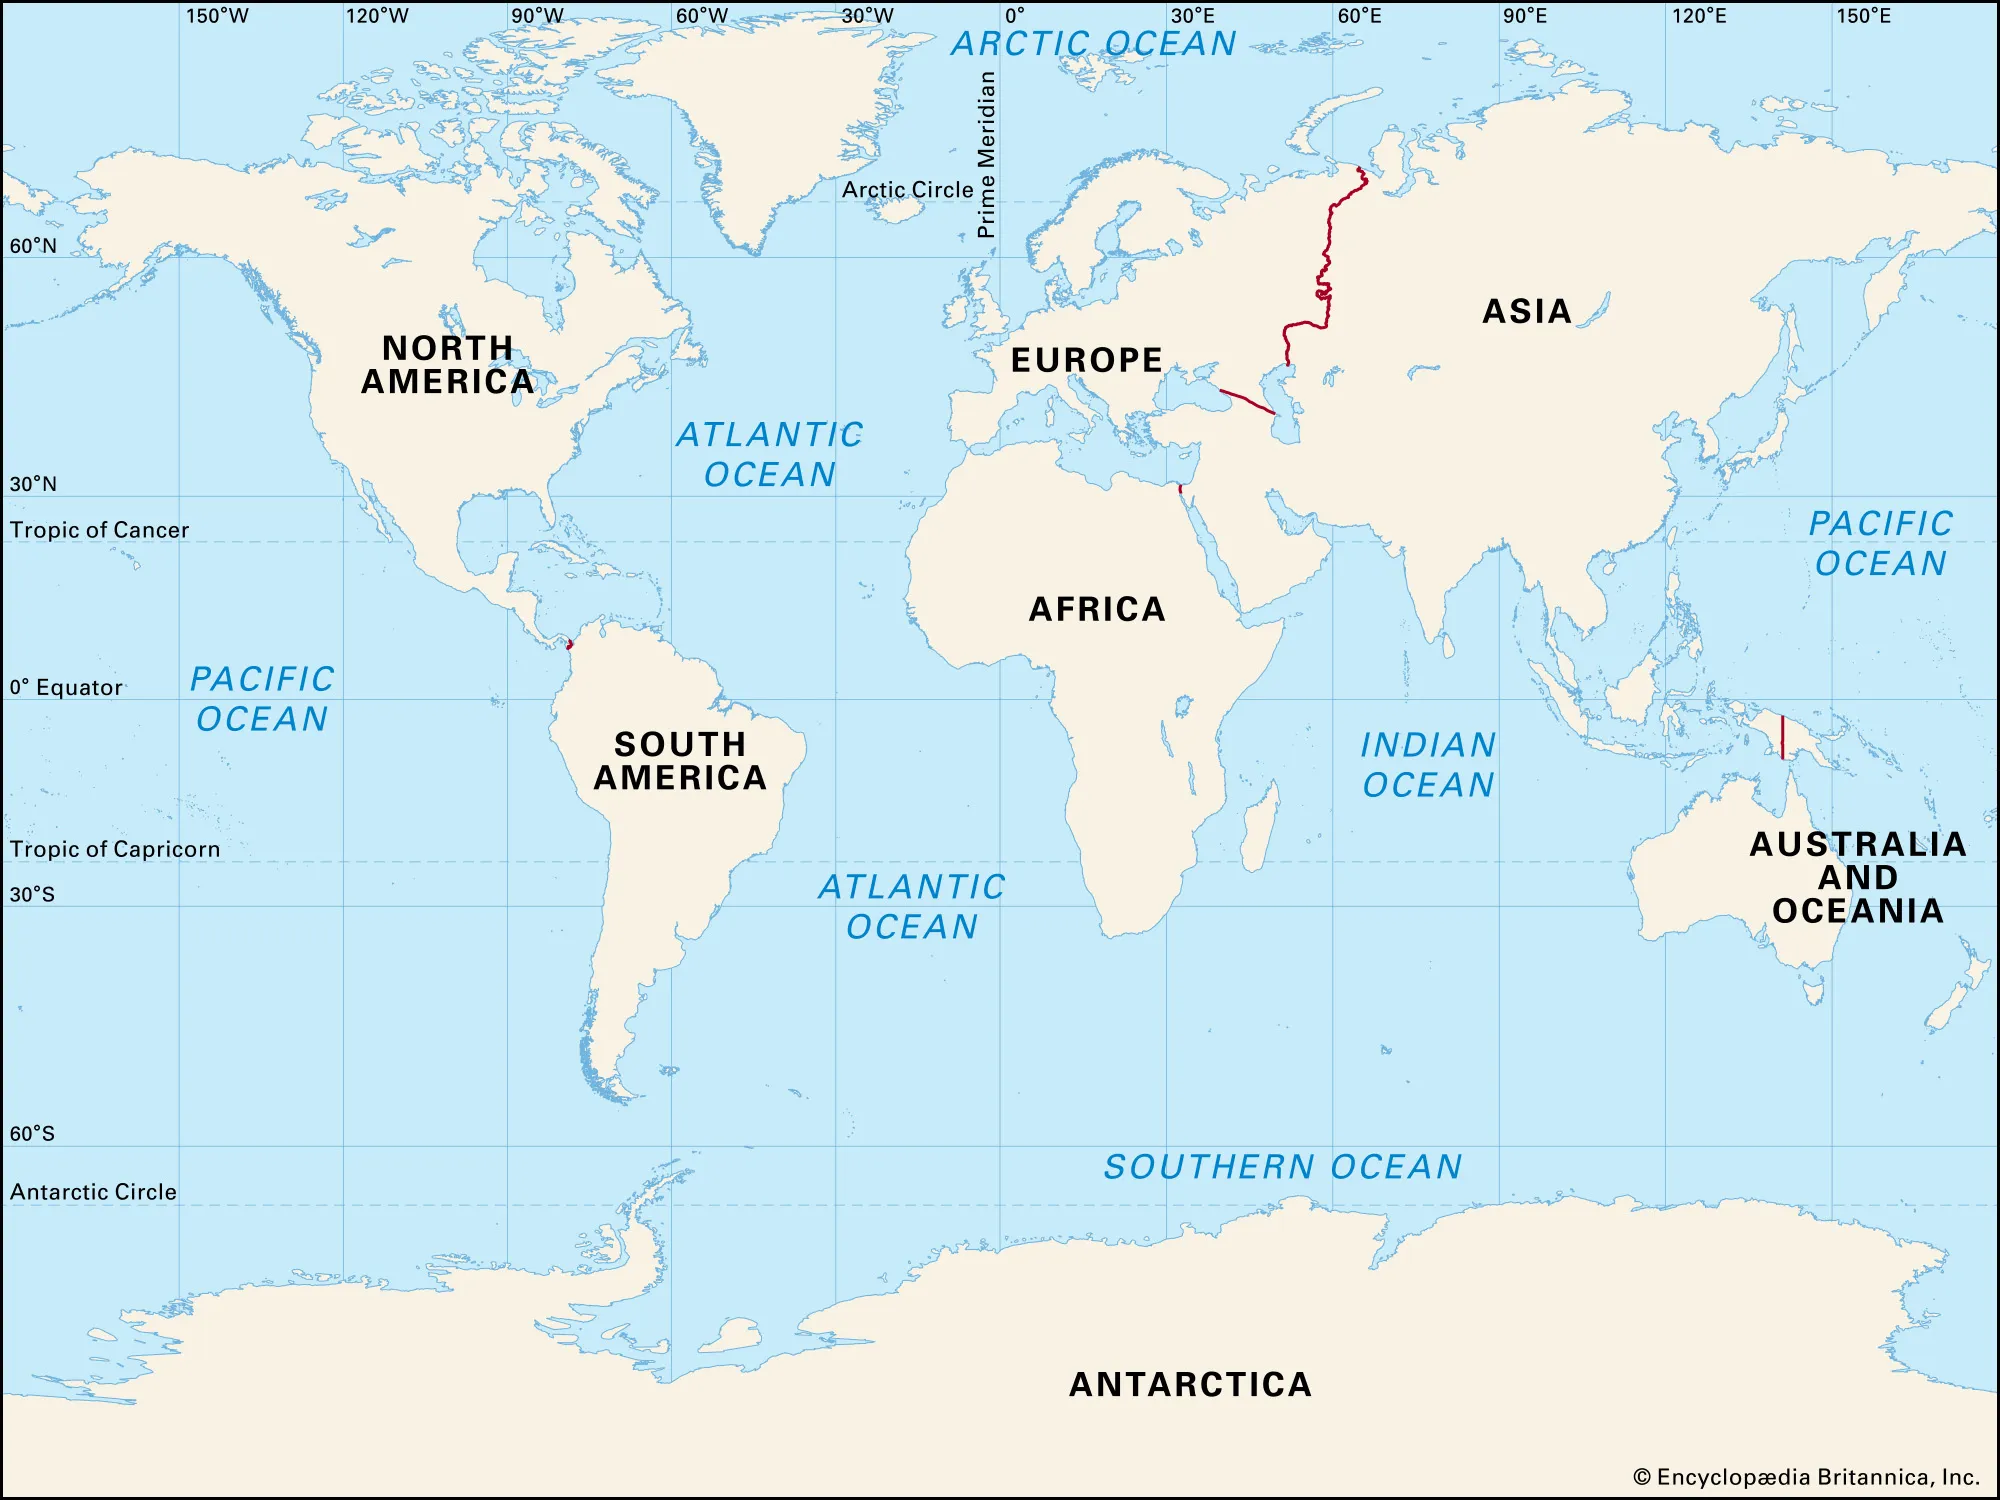

In [47]:
(data['oceans']).value_counts()

oceans
Atlantic Ocean    15271
Pacific Ocean      5744
Indian Ocean        643
Arctic Ocean        310
Southern Ocean       27
Name: count, dtype: int64

Research has been performed in all 5 oceans of the world, but there is a clear disparity. We will investigate this closer by calculating percentages below. 

In [55]:
oceans = ['Atlantic Ocean', 'Pacific Ocean', 'Indian Ocean', 'Arctic Ocean', 'Southern Ocean']

# creating a for loop to go through each ocean and calculate the percentage
for ocean in oceans:
    percentage = np.sum(data['oceans'] == ocean) / len(data) * 100
    print(f'{percentage:.2f}% of microplastic pollution data was collected in the {ocean}')

68.58% of microplastic pollution data was collected in the Atlantic Ocean
25.80% of microplastic pollution data was collected in the Pacific Ocean
2.89% of microplastic pollution data was collected in the Indian Ocean
1.39% of microplastic pollution data was collected in the Arctic Ocean
0.12% of microplastic pollution data was collected in the Southern Ocean


Most of the research (~94%) into microplastic pollution has been collected in two oceans; ~69% in the Atlantic Ocean, followed by ~26% in the Pacific Ocean. This disparity suggests a potential geographical bias in microplastic pollution research, with the Atlantic and Pacific Oceans being prioritized for study. While these regions are critical due to their size and role in global oceanic systems, the limited focus on the Indian Ocean (~3%), Arctic Ocean (~1%), and Southern Ocean (<1%) indicates potential gaps in understanding the global distribution and impact of microplastics. These underrepresented regions, particularly the Arctic and Southern Oceans, may also be vulnerable to microplastic pollution due to their unique ecosystems and limited human monitoring, emphasizing the need for more balanced research efforts.

In [ ]:
ocean_stats = measurements.groupby('oceans')['measurement'].describe()
ocean_stats

# using the 'measurements' dataframe instead of our 'data' dataframe because we delt with the missing values

count        mean           std  min      25%       50%  \
oceans                                                                      
Arctic Ocean      310.0    7.547905     29.438883  0.0  0.00025  0.064958   
Atlantic Ocean  10100.0  186.781137   2599.440023  0.0  0.00000  0.009000   
Indian Ocean      637.0  175.226529    569.106237  0.0  0.01047  0.121639   
Pacific Ocean    5375.0  829.972113  14056.065678  0.0  0.00000  0.010800   
Southern Ocean     27.0    0.050813      0.132226  0.0  0.00000  0.008000   

                      75%            max  
oceans                                    
Arctic Ocean     1.000000     375.000000  
Atlantic Ocean   0.088552  110480.000000  
Indian Ocean    18.000000    4320.000000  
Pacific Ocean    0.647962  800000.000000  
Southern Ocean   0.012500       0.499663

The Pacific Ocean has the highest mean measurement of microplastics (~830 units), followed by the Atlantic (~187 units) and Indian Oceans (~175 units). The Pacific Ocean also shows the largest variability in measurements of microplastics, as indicated by its high standard deviation (~14,056) and maximum recorded value (800,000 units). This suggests significant pollution hotspots in the Pacific, likely driven by phenomena such as the Great Pacific Garbage Patch (REF??). While research in the Arctic and Southern Oceans reveal much lower mean values, ~8 units and ~0.05 units respectively, this could be attributed to the limited sampling in these oceans. It therefore raises questions about whether these numbers truly reflect their pollution levels, and emphasises the need for more research to take place. The Southern Ocean has consistently low values across all metrics, likely due to a combination of its remote location and limited research focus.

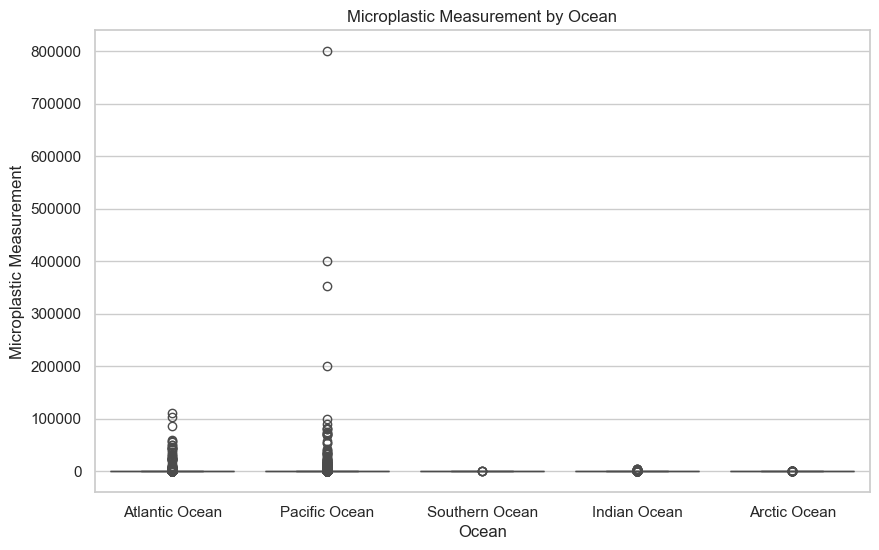

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='oceans', y='measurement')
plt.title('Microplastic Measurement by Ocean')
plt.xlabel('Ocean')
plt.ylabel('Microplastic Measurement')
plt.show()

800,000 units was flagged by us as an outlier, but the data source checked....

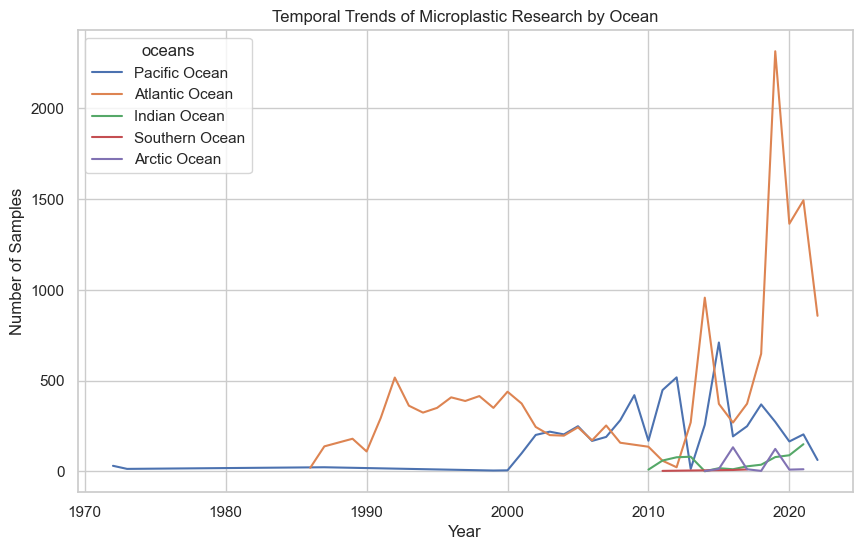

In [71]:
ocean_years = data.groupby(['year', 'oceans']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=ocean_years, x='year', y='count', hue='oceans')
plt.title('Temporal Trends of Microplastic Research by Ocean')
plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.show()

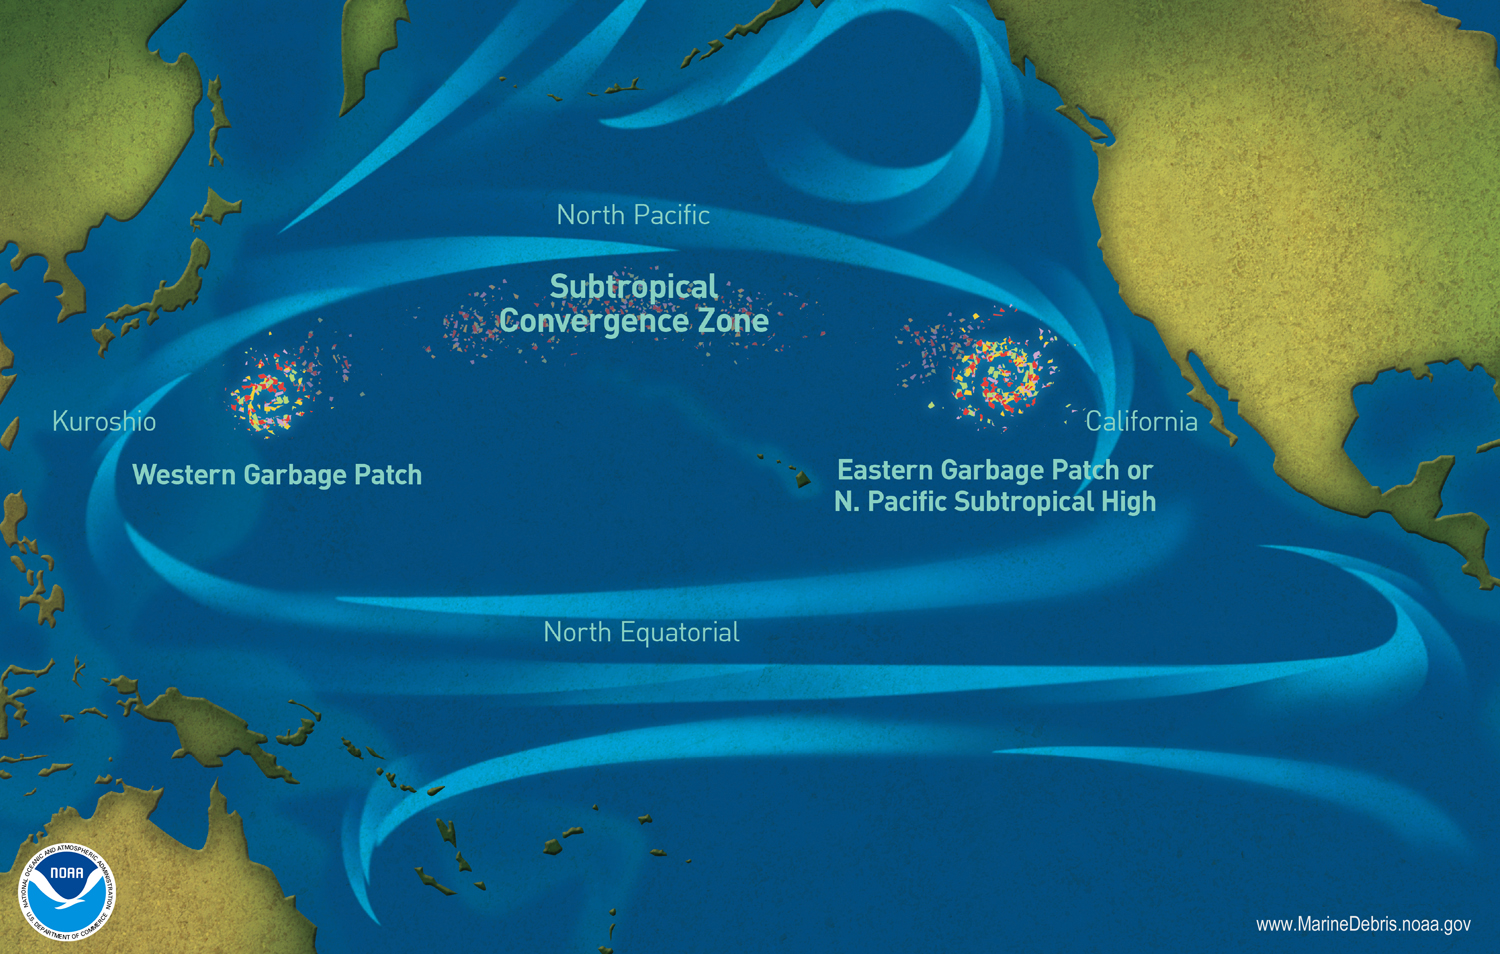

The Great Pacific Garbage Patch, also known as the Pacific Trash Vortex - image from https://education.nationalgeographic.org/resource/great-pacific-garbage-patch/. 

In [88]:
formula_string = "measurement ~ oceans" 

model = sm.formula.ols(formula = formula_string, data = data)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            measurement   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.588
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           0.000172
Time:                        13:59:50   Log-Likelihood:            -1.7175e+05
No. Observations:               16449   AIC:                         3.435e+05
Df Residuals:                   16444   BIC:                         3.436e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [89]:
data['month'].value_counts()

month
12    2488
10    2358
5     2324
4     2195
11    2187
8     1767
7     1703
2     1692
3     1600
6     1397
9     1294
1     1261
Name: count, dtype: int64

# Seasonal Analysis

Defining the seasons according to the [Met Office](https://www.metoffice.gov.uk/weather/learn-about/met-office-for-schools/other-content/other-resources/our-seasons).

**Winter:** December (12), January (1), February (2)

**Spring:** March (3), April (4), May (5)

**Summer:** June (6), July (7), August (8)

**Autumn:** September (9), October (10), November (11)



In [53]:
data.head()

oceans regions subregions sampling method  measurement       unit  \
0  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
1  Atlantic Ocean     NaN        NaN     Neuston net     0.002276  pieces/m3   
2  Atlantic Ocean     NaN        NaN     Neuston net     0.004320  pieces/m3   
3  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   
4  Atlantic Ocean     NaN        NaN     Neuston net     0.000000  pieces/m3   

  density range density class               organization  \
0      0-0.0005      Very Low  Sea Education Association   
1  0.0005-0.005           Low  Sea Education Association   
2  0.0005-0.005           Low  Sea Education Association   
3      0-0.0005      Very Low  Sea Education Association   
4      0-0.0005      Very Low  Sea Education Association   

                                      accession link  latitude  longitude  \
0  https://www.ncei.noaa.gov/access/metadata/land...     45.28     -60.29   
1  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
2  https://www.ncei.noaa.gov/access/metadata/land...     40.93     -70.65   
3  https://www.ncei.noaa.gov/access/metadata/land...     40.30     -69.77   
4  https://www.ncei.noaa.gov/access/metadata/land...     39.88     -67.15   

        date      x      y  year  month  season  
0 1989-07-13 -60.29  45.28  1989      7  Summer  
1 1989-10-12 -70.65  40.93  1989     10  Autumn  
2 1989-10-12 -70.65  40.93  1989     10  Autumn  
3 1989-10-12 -69.77  40.30  1989     10  Autumn  
4 1989-10-15 -67.15  39.88  1989     10  Autumn

In [70]:
formula_string = "measurement ~ month" 

model = sm.formula.ols(formula = formula_string, data = data)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            measurement   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.680
Date:                Fri, 20 Dec 2024   Prob (F-statistic):            0.00559
Time:                        16:54:53   Log-Likelihood:            -1.7176e+05
No. Observations:               16449   AIC:                         3.435e+05
Df Residuals:                   16447   BIC:                         3.435e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    764.9176    149.031      5.133      0.0

In [58]:
formula_string = "measurement ~ season" 

model = sm.formula.ols(formula = formula_string, data = data)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            measurement   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.960
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           6.31e-06
Time:                        16:03:39   Log-Likelihood:            -1.7175e+05
No. Observations:               16449   AIC:                         3.435e+05
Df Residuals:                   16445   BIC:                         3.435e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          100.1526    125.189  

C:\Users\charl\AppData\Local\Temp\ipykernel_30280\1910557475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='season', order=['Winter', 'Spring', 'Summer', 'Autumn'],


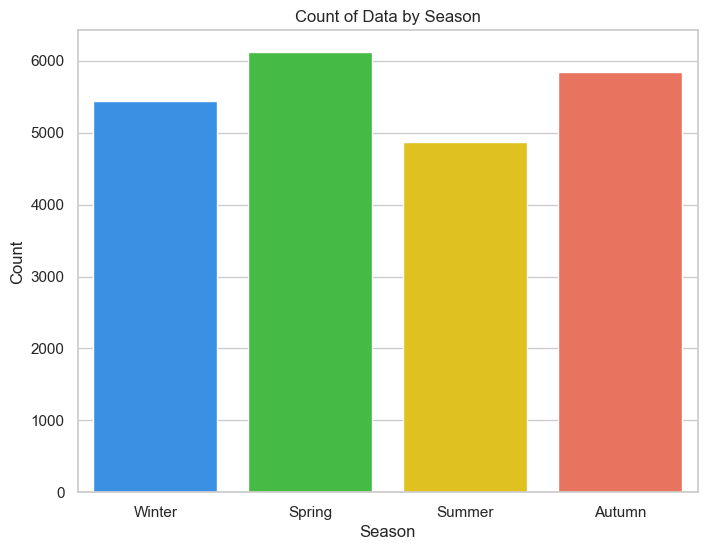

In [ ]:
# looking at the distribution of data across the seasons

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='season', order=['Winter', 'Spring', 'Summer', 'Autumn'], 
              palette=['#1E90FF', '#32CD32', '#FFD700', '#FF6347'])
plt.title('Count of Data by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

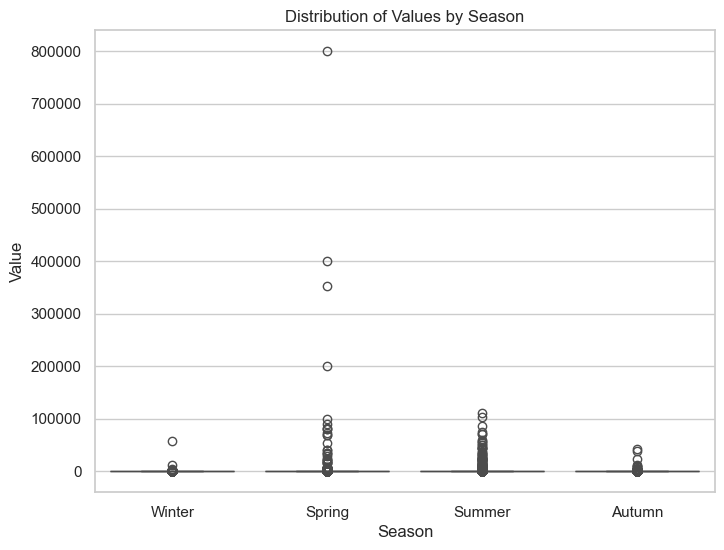

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='season', y='measurement', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Distribution of Values by Season')
plt.xlabel('Season')
plt.ylabel('Value')
plt.show()

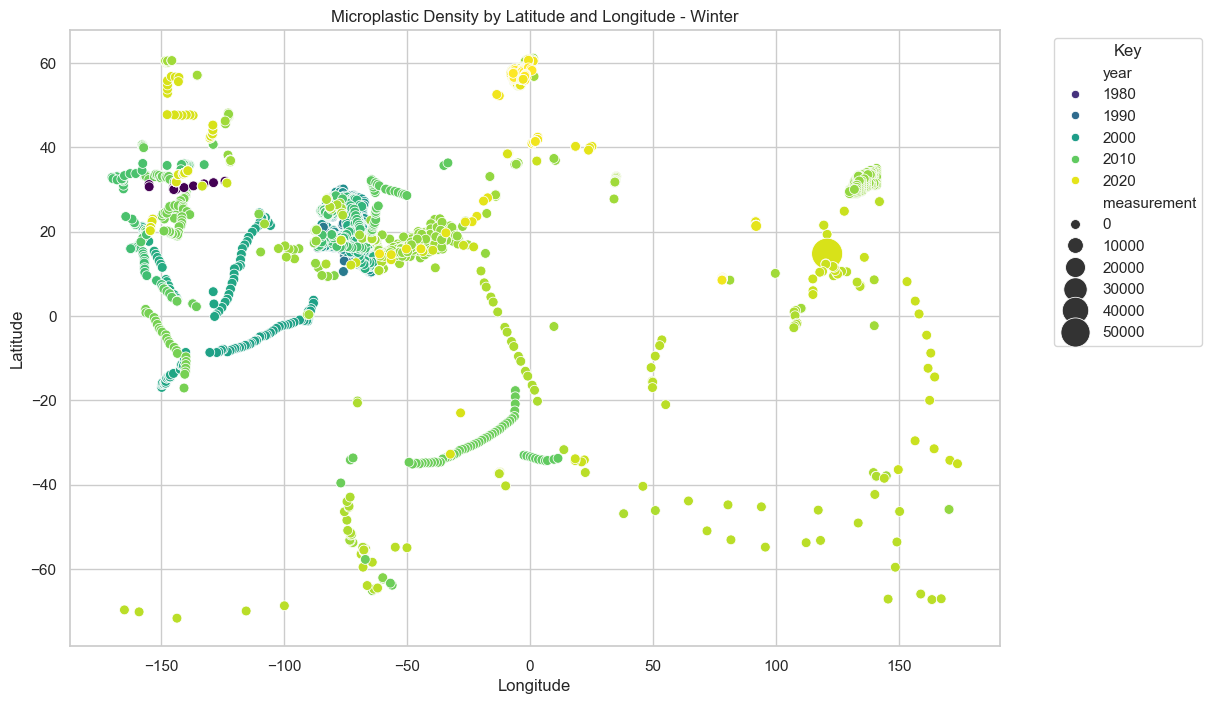

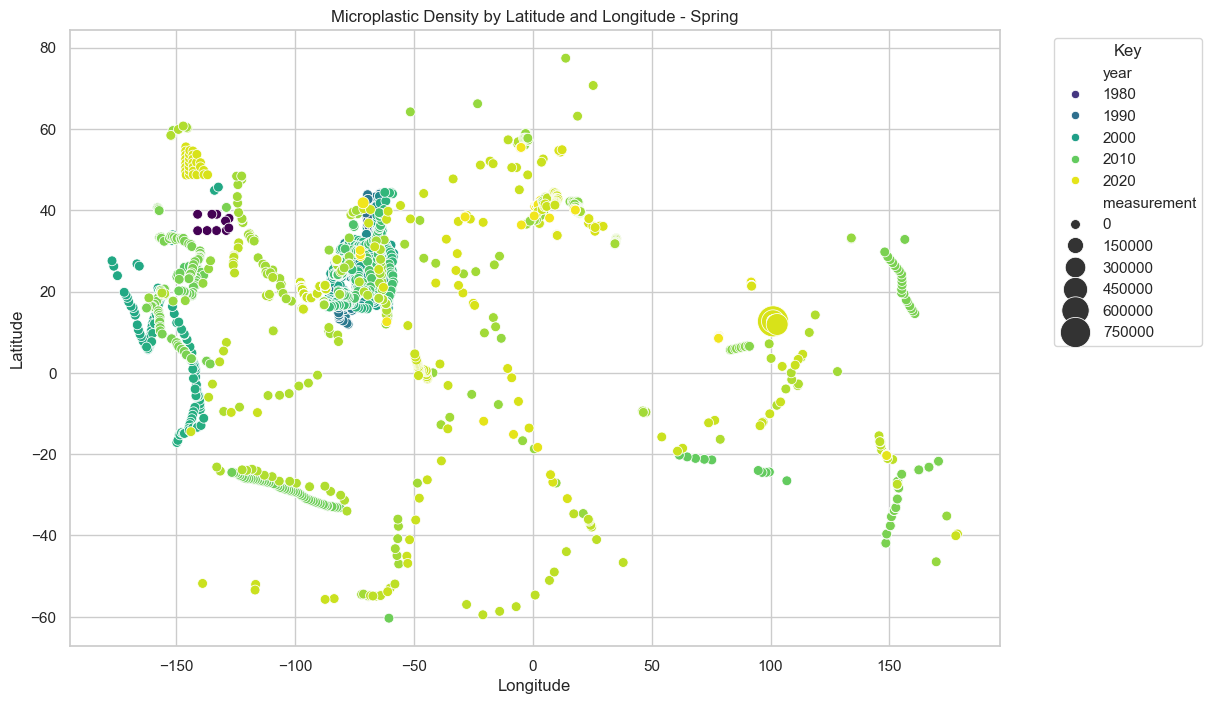

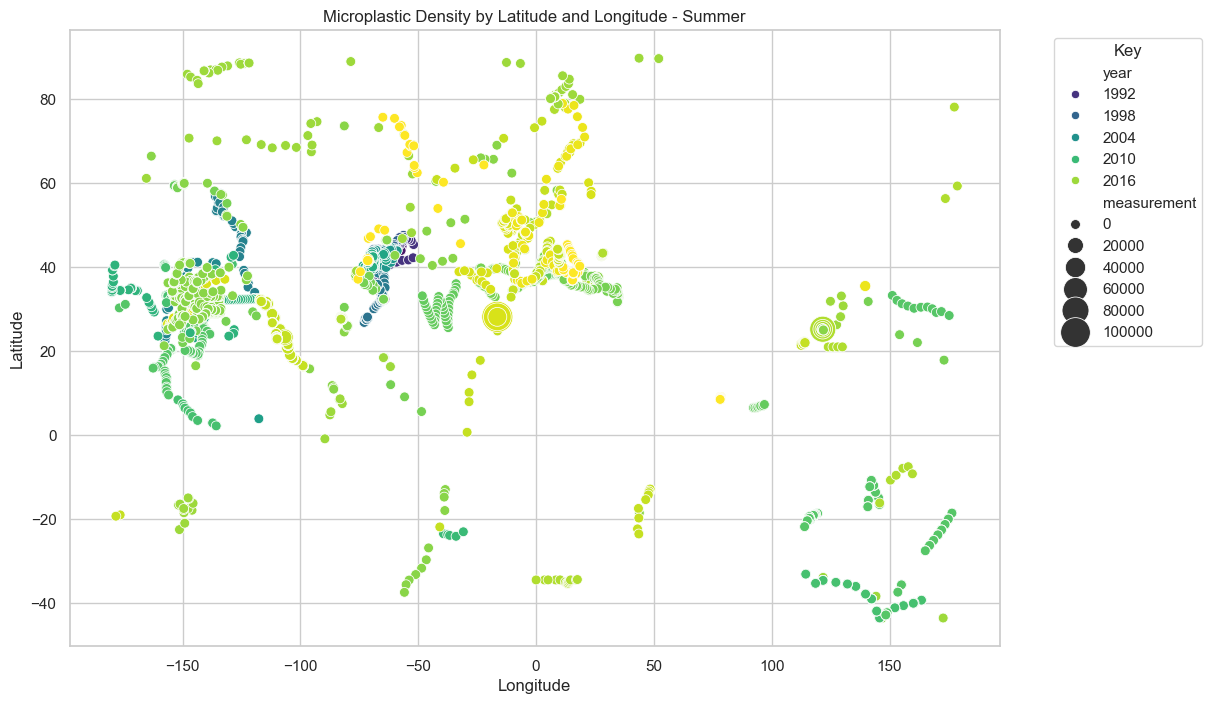

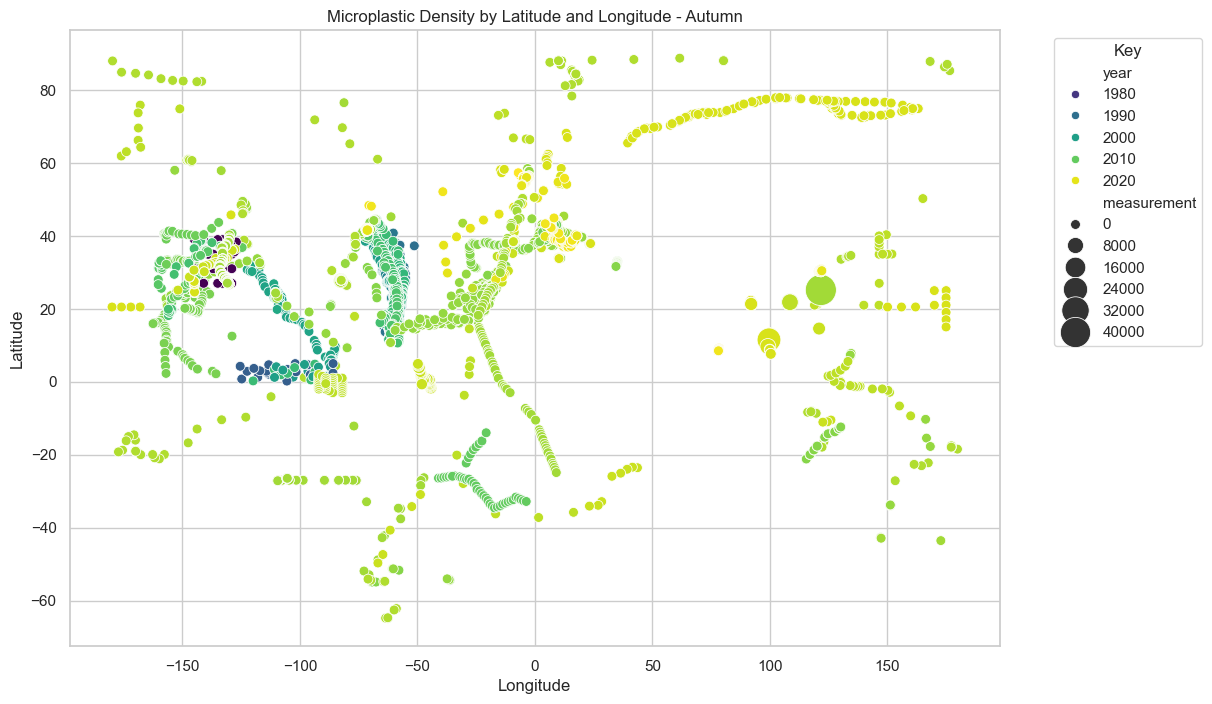

In [86]:
# mapping the measurement and year data for the seasons

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

for season in seasons:
    season_data = data[data['season'] == season]

    plt.figure(figsize=(12, 8))
    
    sns.scatterplot(data=season_data, x='longitude', y='latitude', hue='year', size='measurement', 
                    palette='viridis', sizes=(50, 500))

    #plt.xlim(-180, 180)
    #plt.ylim(-90, 90)
    plt.title(f'Microplastic Density by Latitude and Longitude - {season}')
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.legend(title='Key', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()